In [11]:
import pandas as pd
import numpy as np
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


player = pd.read_csv('Clean_Data/player.csv')
all_wc_matches = pd.read_csv('Clean_Data/all_world_cup_matches.csv')
all_wc_winners = pd.read_csv('Clean_Data/all_world_cup_winners.csv')
all_wc_matches.head()

In [44]:
# numbers
# count number of winning for each country, ascending order
host_team = all_wc_matches['home_team'].value_counts()
winner = all_wc_matches['winning_team'].value_counts()
loser = all_wc_matches['losing_team'].value_counts()

teams = pd.concat([host_team, winner, loser], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams[0:15]

,home_team,winning_team,losing_team
Brazil,79,73,18
Germany,79,67,22
Argentina,55,43,23
Italy,53,45,17
France,36,34,19
England,36,29,19
Spain,32,30,18
Sweden,31,19,19
Uruguay,31,24,20
Netherlands,28,27,11


Top 15 hosted country and winning/losing stats from 1930 ~ 2018 Note: This visualization corresponded to Slide 5

In [84]:
# visualization
# The number of times of each country that joins the world cup since 1930 (1930 - 2018)
# - modify based on the data we have: number of times of each country that hosted the world cup from 1930 - 2018


# wins
host_team = all_wc_matches['home_team'].value_counts()
winner = all_wc_matches['winning_team'].value_counts()
# winner
loser = all_wc_matches['losing_team'].value_counts()
teams = pd.concat([host_team, winner, loser], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
# plot top 15
teams[0:15].iplot(kind='bar', xTitle = 'Country Names', yTitle = 'Number of times', color = ['#FFC266', '#66B2FF', '#20B2AA'],title = 'Top 15 hosted country and w.r.t winning/losing stats')



Matches With highest number of attendence Note: This visualization corresponded to Slide 6


In [86]:
winner2 = all_wc_winners['winner'].value_counts()
runnersup = all_wc_winners['runners-up'].value_counts()
third = all_wc_winners['third'].value_counts()
teams = pd.concat([winner2, runnersup, third], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
# winner2
teams
teams[0:15].iplot(kind='bar', xTitle = 'Country Names', yTitle = 'Number of times', color = ['#FFC266', '#66B2FF', '#20B2AA'],title = 'Top 15 countries with winning count')


Countries Hits Number of Goals Note: This visualization corresponded to Slide 7

In [87]:

home = all_wc_matches[['home_team', 'home_goals']].dropna()
away = all_wc_matches[['away_team', 'away_goals']].dropna()
# print(home)

home.columns = ['Countries', 'Goals']
away.columns = home.columns

goals = home.append(away, ignore_index = True)
goals = goals.groupby('Countries').sum()
goals = goals.sort_values(by = 'Goals', ascending=False)
# goals

goals[:15].iplot(kind='bar', xTitle = 'Country Names', yTitle = 'Goals',color= '#FFC266', title = 'Countries Hits Number of Goals')

/var/folders/77/nly344qd2cx1lsts0mnvm_fw0000gn/T/ipykernel_35829/2538814747.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### GDP by Contries Overview

In [6]:
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.io as pio
import pandas as pd
import plotly.express as px

data = pd.read_csv("Clean_Data/goals_gdp.csv")

df_2018 = data[data['year']==2018]
df_2018 = df_2018.sort_values(['country_name'])
gdp_2018 = df_2018[['country_name', 'gdp_billion']].sort_values('gdp_billion')

# Create the bar chart using plotly express
fig = px.bar(gdp_2018, x='country_name', y='gdp_billion', title='GDP by Country, 2018', color_discrete_sequence=['#FFC266'])
fig.update_layout(title_text="GDP by Country", title_x=0.5, title_y=0.85, title_font=dict(size=20),
                    legend=dict(title_font_family="Times New Roman",
                    font=dict(size= 20)),
                    yaxis=dict(title='GDP (Billion Dollars)'),
                    plot_bgcolor='rgb(243, 243, 243)',
                    )

fig.show()
# pio.write_image(fig, 'images/gdp_country.png', width=2000, height=800)

In [8]:
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.io as pio
import pandas as pd
import plotly.express as px

data = pd.read_csv("Clean_Data/goals_gdp.csv")

df_2018 = data[data['year']==2018]
df_2018 = df_2018.sort_values(['country_name'])
gdp_2018 = df_2018[['country_name', 'gdp_billion']].sort_values('gdp_billion')


df = gdp_2018

# Create bins for GDP values
bins = [0, 500, 1000, 2000, 5000, 20000]

# Group the data by the bins
df['gdp_range'] = pd.cut(df['gdp_billion'], bins=bins, labels=['<500', '500-1000', '1000-2000', '2000-5000', '>5000'])
grouped = df.groupby('gdp_range')['country_name'].count()

# Create the pie chart using plotly express
fig = px.pie(values=grouped.values, names=grouped.index, title='GDP Ranges by Country', color_discrete_sequence=[ '#66B2FF', '#FFC266','#20B2AA', '#FF6666', '#B266FF'])
fig.update_layout(title_text="GDP Ranges by Country", title_x=0.45, title_y=0.88, title_font=dict(size=20),
                    legend=dict(title_font_family="Times New Roman",
                    font=dict(size= 20)))
fig.show()


pio.write_image(fig, 'images/gdp_pie.png')

### GDP and #Goals for Selected Countries

In [15]:
## Plot gdp
import pandas as pd

## Read in dataset
goals_gdp = pd.read_csv("Clean_Data/goals_gdp.csv").set_index('country_name')
goals_gdp.head()
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.io as pio


country_list = ['Argentina', 'Brazil', 'United States', 'France', 'Saudi Arabia']

for country in country_list:

    df = goals_gdp.loc[country]

     # create the bar trace with specified color
    bar_trace = go.Bar(x=df['year'], y=df['gdp_billion'], name='GDP (Billion)', marker=dict(color='#FFC266'))

    # create the line trace with specified color
    line_trace = go.Scatter(x=df['year'], y=df['goals'], name='Goals', yaxis='y2', mode='lines+markers', line_shape='spline', line=dict(color='#66B2FF'))

    # create the layout
    layout = go.Layout(title='GDP & Goals, 1962-2018 - {}'.format(country),
                    xaxis=dict(title='Year'),
                    yaxis=dict(title='GDP (Billion Dollars)'),
                    yaxis2=dict(title='Goals', overlaying='y', side='right'),
                    plot_bgcolor='rgb(243, 243, 243)',
                    )

    # create the figure
    fig = go.Figure(data=[bar_trace, line_trace], layout=layout)

    # plot the figure
    pyo.iplot(fig)

    # save the figure as an HTML file
    pio.write_image(fig, file='GDP_Goals_vs_time_{}.png'.format(country), format='png', width=1600, height=800)


### Bubble Chart for Correlation between GDP and #Goals

In [2]:
#### Process Toal goals vs. Average GDP ####
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import math


## Read in GDP dataset
goals_gdp = pd.read_csv("Clean_Data/goals_gdp_with_continent.csv").set_index('country_name')

# group the data by country
grouped_df = goals_gdp.groupby('country_name')

# calculate the correlation for each country
corrs = grouped_df[['gdp_billion', 'goals']].corr().iloc[0::2,-1]

# create a new dataframe with the results
corrs = pd.DataFrame({'country_name': corrs.index.get_level_values(0),
                           'correlation': corrs.values}).sort_values(by = 'country_name').fillna(0)

# calculate the mean of GDP and goals for each country
df_avg = goals_gdp.groupby(['country_name', 'continent']).mean().drop('year', axis=1).reset_index().sort_values(by='country_name').rename(columns={'goals':'avg_goals', 'gdp_billion':'avg_gdp_billion'})

# calculate the total Goals for each country
df_sum = goals_gdp.groupby(['country_name', 'continent']).sum().drop('year', axis=1).reset_index().sort_values(by='country_name')

df_avg['total_goals'] = df_sum['goals']

df_avg.head()


#### Plot the results ####

# Load data, define hover text and bubble size
data = pd.read_csv("Clean_Data/goals_gdp_with_continent.csv")
df_2018 = data[data['year']==2018]
df_2018 = df_2018.sort_values(['continent', 'country_name'])
df_2018 = pd.merge(df_2018, corrs, how='left', on='country_name').rename(columns={'correlation':'corr'})
df_2018.head()

hover_text = []
bubble_size = []

for index, row in df_2018.iterrows():
    hover_text.append(('Country: {country}<br>' +
                       'GDP: {gdp}<br>' +
                      'Goals: {goals}<br>' +
                      'Correlation: {corr}').format(country=row['country_name'],
                                               gdp=row['gdp_billion'],
                                               goals=row['goals'],
                                               corr=row['corr']))
    bubble_size.append(abs(row['corr']))

df_2018['text'] = hover_text
df_2018['size'] = bubble_size
sizeref = 2.*max(df_2018['size'])/(100**2)

# Dictionary with dataframes for each continent
continent_names = ['Africa', 'Asia', 'Europe',
                   'North America', 'Oceania', 'South America']
continent_data = {continent: df_2018.query("continent == '%s'" % continent)
                  for continent in continent_names}


# Create figure
fig = go.Figure()

for continent_name, continent in continent_data.items():
    fig.add_trace(go.Scatter(
        x=continent['gdp_billion'], y=continent['goals'],
        name=continent_name, text=continent['text'],
        marker_size=continent['size'],
    ))
    



# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Goals in World Cup vs. GDP, 2018',
    xaxis=dict(
        title='GDP (billion dollars)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Goals in wold cup',
        gridcolor='white',
        gridwidth=2,
    ),
    # paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)


fig.show()
pio.write_html(fig, 'images/gdp_buble.html')

In [17]:
import pandas as pd
import numpy as np

In [18]:
fifa_matches = pd.read_csv('./Data/FIFA_world_cup_matches.csv')
fifa_matches = fifa_matches.rename(columns={
    'completed line breaksteam1': 'completed line breaks team1',
    'completed defensive line breaksteam1': 'completed defensive line breaks team1'
})

In [19]:
argentina_matches = fifa_matches[(fifa_matches.get('team1') == 'ARGENTINA' )|( fifa_matches.get('team2') == 'ARGENTINA')]
argentina_matches

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361
23,ARGENTINA,MEXICO,50%,36%,14%,2,0,26 NOV 2022,20 : 00,Group C,...,0,0,4,5,0,0,63,79,220,327
38,POLAND,ARGENTINA,24%,67%,9%,0,2,30 NOV 2022,20 : 00,Group C,...,0,0,25,4,0,0,67,48,438,141
49,ARGENTINA,AUSTRALIA,53%,35%,12%,2,1,03 DEC 2022,20 : 00,Round of 16,...,0,0,5,14,1,0,67,73,240,453
57,NETHERLANDS,ARGENTINA,45%,44%,11%,2,2,09 DEC 2022,20 : 00,Quarter-final,...,0,1,15,5,0,0,91,79,401,323
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,13 DEC 2022,20 : 00,Semi-final,...,1,0,12,10,0,0,85,63,321,260
63,ARGENTINA,FRANCE,46%,40%,14%,3,3,18 DEC 2022,16 : 00,Final,...,1,2,11,21,0,0,87,104,280,409


In [20]:
def find_all_country(df):
    t1_unique = pd.unique(df.get('team1'))
    t2_unique = pd.unique(df.get('team2'))
    unique_country = set(np.append(t1_unique,t2_unique))
    return list(unique_country)

def count_average_of_all_countries(unique_countries,column_name,funct):
    
    avg_dict = {}
    col1 = column_name + ' team1'
    col2 = column_name + ' team2'
    for country in unique_countries:
        avg_dict[country] = funct(country,col1,col2)
        
    res_df = pd.DataFrame.from_dict(avg_dict,orient='index',columns=[column_name])
    
    res_df = res_df.sort_values(by=column_name,ascending=True)
    return res_df


unique_countries = find_all_country(fifa_matches) 

In [21]:
need_switch = argentina_matches[argentina_matches.get('team2') == 'ARGENTINA']
dont_need_switch = argentina_matches[argentina_matches.get('team1') == 'ARGENTINA']
switched = pd.DataFrame()
for i in range(len(need_switch.columns)):
    if 'team1' in need_switch.columns[i]:
        col1, col2 = need_switch.columns[i], need_switch.columns[i+1]
        switched[col1] = need_switch.get(col2)
        switched[col2] = need_switch.get(col1)
    else:
        if 'team2' in need_switch.columns[i]:
            continue
        col1= need_switch.columns[i]
        switched[col1] = need_switch.get(col1)
    
processed_with_ARG_on_team1_df = pd.concat([dont_need_switch, switched], axis=0).rename(columns={'completed line breaksteam1': 'completed line breaks team1'
                                                                                                 , 'completed defensive line breaksteam1':'completed defensive line breaks team1'
                                                                                                ,'attempts inside the penalty area  team2':'attempts inside the penalty area team2'
                                                                                                ,'attempts outside the penalty area  team1':'attempts outside the penalty area team1'
                                                                                                ,'attempts outside the penalty area  team2':'attempts outside the penalty area team2'
                                                                                                }).sort_index(ascending=True)
processed_with_ARG_on_team1_df

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361
23,ARGENTINA,MEXICO,50%,36%,14%,2,0,26 NOV 2022,20 : 00,Group C,...,0,0,4,5,0,0,63,79,220,327
38,ARGENTINA,POLAND,67%,24%,9%,2,0,30 NOV 2022,20 : 00,Group C,...,0,0,4,25,0,0,48,67,141,438
49,ARGENTINA,AUSTRALIA,53%,35%,12%,2,1,03 DEC 2022,20 : 00,Round of 16,...,0,0,5,14,1,0,67,73,240,453
57,ARGENTINA,NETHERLANDS,44%,45%,11%,2,2,09 DEC 2022,20 : 00,Quarter-final,...,1,0,5,15,0,0,79,91,323,401
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,13 DEC 2022,20 : 00,Semi-final,...,1,0,12,10,0,0,85,63,321,260
63,ARGENTINA,FRANCE,46%,40%,14%,3,3,18 DEC 2022,16 : 00,Final,...,1,2,11,21,0,0,87,104,280,409


# Attack


- number of goals team1
- number of goals team2

Having the ability to attempt goals is a way of demonstrating the attacking ability 
- total attempts team1
- total attempts team2
- on target attempts team1
- on target attempts team2
- off target attempts team1
- off target attempts team2
- attempts inside the penalty area team1
- attempts inside the penalty area team2
- attempts outside the penalty area team1
- attempts outside the penalty area team2



what the player is doing when they are not on the ball.\
One of the ways FIFA is looking to answer this question is by investigating player behaviours off the ball and this is where offering to receive comes into play.\
An offer is attributed to a player when they demonstrate this behaviour, regardless of whether they receive the ball or not.
- total offers to receive team1
- total offers to receive team2
- inbehind offers to receive team1
- inbehind offers to receive team2
- inbetween offers to receive team1
- inbetween offers to receive team2
- infront offers to receive team1
- infront offers to receive team2

Receptions behind the midfield and defensive lines identifies where players receive the ball in relation to the opposition's team shape. Every successful reception of the ball counts, regardless of the next sequence of play.
- receptions between midfield and defensive lines team1
- receptions between midfield and defensive lines team2
- attempted line breaks team1
- attempted line breaks team2
- completed line breaks team1
- completed line breaks team2
- attempted defensive line breaks team1
- attempted defensive line breaks team2
- completed defensive line breaks team1
- completed defensive line breaks team2

## Offers to receive: what the player is doing when they are not on the ball. 

On average, a player is in possession of the ball for a total of one minute and 49 seconds over the course of 90 minutes. 
Analysing the impact a player has on the game through their off-the-ball actions has become an invaluable and insightful performance indicator,but in reality, little is known about player behaviour when out of possession.

An in-game example of offering to receive would be when a central midfielder performs a movement towards the central defenders to request the ball into feet. 
Another example would be an attacking player signalling behind the opposition’s defensive line in anticipation of a pass into the space they are seeking to exploit.

### Insight: the difference of the amount of offers to receive in the first few games are much greater compared to that of the last few games


In [22]:
offers_to_receive = processed_with_ARG_on_team1_df.get(['team1'
                                                 ,'team2'
                                                 ,'total offers to receive team1'
                                                 ,'total offers to receive team2'
                                                 ,'inbehind offers to receive team1'
                                                 ,'inbehind offers to receive team2'
                                                 ,'inbetween offers to receive team1'
                                                 ,'inbetween offers to receive team2'
                                                 ,'infront offers to receive team1'
                                                 ,'infront offers to receive team2'
                                                ])

offers_to_receive  

,team1,team2,total offers to receive team1,total offers to receive team2,inbehind offers to receive team1,inbehind offers to receive team2,inbetween offers to receive team1,inbetween offers to receive team2,infront offers to receive team1,infront offers to receive team2
4,ARGENTINA,SAUDI ARABIA,650,268,157,69,177,131,316,68
23,ARGENTINA,MEXICO,569,373,103,78,244,151,222,144
38,ARGENTINA,POLAND,907,328,175,62,282,126,450,140
49,ARGENTINA,AUSTRALIA,869,538,131,105,337,184,401,249
57,ARGENTINA,NETHERLANDS,644,722,97,117,278,278,269,327
60,ARGENTINA,CROATIA,349,643,89,136,122,291,138,216
63,ARGENTINA,FRANCE,607,507,146,105,257,207,204,195


In [23]:
offers_to_receive_plot = offers_to_receive.get(['total offers to receive team1'
                     ,'total offers to receive team2'])
offers_to_receive_plot = offers_to_receive_plot.rename(
    columns={'total offers to receive team1': 'Argentina'
                     , 'total offers to receive team2':'Opponent team'
                    })
offers_to_receive_plot.index = offers_to_receive.get('team2')
offers_to_receive_plot.index.names = ['Opponent']
offers_to_receive_plot

,Argentina,Opponent team
Opponent,,
SAUDI ARABIA,650,268
MEXICO,569,373
POLAND,907,328
AUSTRALIA,869,538
NETHERLANDS,644,722
CROATIA,349,643
FRANCE,607,507


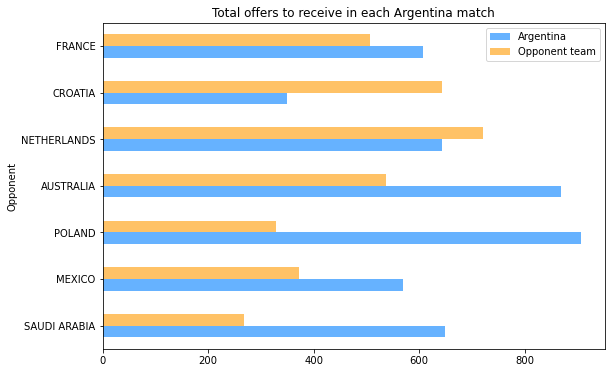

In [24]:
ax_offers_to_receive_plot = offers_to_receive_plot.plot.barh(
    figsize=(9,6), 
    title='Total offers to receive in each Argentina match',
    color = ['#66B2FF','#FFC266']
);

### Average offer to receive avg within all countries
### Insight: 

In [25]:
def count_offer_to_receive_avg(country, col1, col2):
    
    matches_contain_that_country_team1 = fifa_matches[(fifa_matches.get('team1') == country)]
    matches_contain_that_country_team2 = fifa_matches[(fifa_matches.get('team2') == country)]
    try:
        total_len = len(matches_contain_that_country_team1.get(col1)) + len(matches_contain_that_country_team2.get(col2) )
        total_sum = matches_contain_that_country_team1.get(col1).sum() + matches_contain_that_country_team2.get(col2).sum() 
        res = total_sum/total_len
        return res 
    except:
        print(country)
        print()
        raise 

    
    

In [26]:

df_total_offer_to_receive = count_average_of_all_countries(unique_countries, 'total offers to receive',count_offer_to_receive_avg)[-10:]
df_inbehind_offer_to_receive = count_average_of_all_countries(unique_countries, 'inbehind offers to receive',count_offer_to_receive_avg)[-10:]
df_inbetween_offer_to_receive = count_average_of_all_countries(unique_countries, 'inbetween offers to receive',count_offer_to_receive_avg)[-10:]
df_infront_offer_to_receive = count_average_of_all_countries(unique_countries, 'infront offers to receive',count_offer_to_receive_avg)[-10:]


### Attempts on goal
The total attempt demonstrates the attacking ability of a team, since a team needs to have the ability to break through defensive line in order to attemp the goals

### Insight: Argentina has strong attacking ability  

In [27]:
attempts_on_goal = processed_with_ARG_on_team1_df.get(['team1'
                                                 ,'team2'
                                                 ,'total attempts team1'
                                                 ,'total attempts team2'
                                                 ,'on target attempts team1'
                                                 ,'on target attempts team2'
                                                 ,'off target attempts team1'
                                                 ,'off target attempts team2'
                                                 ,'attempts inside the penalty area team1'
                                                 ,'attempts inside the penalty area team2'
                                                 ,'attempts outside the penalty area team1'
                                                 ,'attempts outside the penalty area team2'
                                                ])

attempts_on_goal
# the total attempt demonstrate the attacking ability of a team, 
# since a team needs to have the ability to break through defensive line in order to attemp the goals

# insight: Argentina has strong attacking ability  



,team1,team2,total attempts team1,total attempts team2,on target attempts team1,on target attempts team2,off target attempts team1,off target attempts team2,attempts inside the penalty area team1,attempts inside the penalty area team2,attempts outside the penalty area team1,attempts outside the penalty area team2
4,ARGENTINA,SAUDI ARABIA,14,3,6,2,5,0,10,3,4,0
23,ARGENTINA,MEXICO,5,4,2,1,3,2,2,1,3,3
38,ARGENTINA,POLAND,25,4,13,0,8,2,21,2,4,2
49,ARGENTINA,AUSTRALIA,14,5,5,2,7,2,11,3,3,2
57,ARGENTINA,NETHERLANDS,15,5,6,2,8,2,5,3,10,2
60,ARGENTINA,CROATIA,10,12,7,3,2,7,7,6,3,6
63,ARGENTINA,FRANCE,21,10,9,5,9,3,10,7,11,3


In [28]:
total_attempt_plot = attempts_on_goal.get(['total attempts team1'
                     ,'total attempts team2'])
total_attempt_plot = total_attempt_plot.rename(columns={'total attempts team1': 'Argentina'
                     , 'total attempts team2':'Opponent team'
                    })
total_attempt_plot.index = offers_to_receive.get('team2')
total_attempt_plot.index.names = ['Opponent']
total_attempt_plot

,Argentina,Opponent team
Opponent,,
SAUDI ARABIA,14,3
MEXICO,5,4
POLAND,25,4
AUSTRALIA,14,5
NETHERLANDS,15,5
CROATIA,10,12
FRANCE,21,10


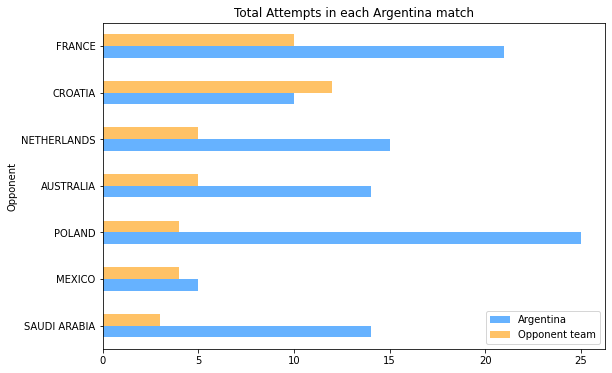

In [29]:
ax_total_attempt_plot = total_attempt_plot.plot.barh(
    figsize=(9,6), 
    title='Total Attempts in each Argentina match',
    color = ['#66B2FF','#FFC266']
    );


### Average attempts avg within all countries
### Insight: 
Argentina is one the top 3 total attempt countries and  one the top 3 on target attempt countries
Germany is the top 1 total attempt country and top 1 off target attempt country
Brazil is the top 2 total attempt country and top 3 off target attempt country

In [30]:
def count_attempt_avg(country, col1, col2):
    
    matches_contain_that_country_team1 = fifa_matches[(fifa_matches.get('team1') == country)]
    matches_contain_that_country_team2 = fifa_matches[(fifa_matches.get('team2') == country)]
    total_len = len(matches_contain_that_country_team1.get(col1) + matches_contain_that_country_team2.get(col2) )
    total_sum = matches_contain_that_country_team1.get(col1).sum() + matches_contain_that_country_team2.get(col2).sum() 
    res = total_sum/total_len
    return res 

count_attempt_avg('ARGENTINA','total attempts team1','total attempts team2')

14.857142857142858

In [31]:
def find_all_country(df):
    t1_unique = pd.unique(df.get('team1'))
    t2_unique = pd.unique(df.get('team2'))
    unique_country = set(np.append(t1_unique,t2_unique))
    return list(unique_country)
    
unique_countries = find_all_country(fifa_matches) 

In [32]:
def count_attempt_average_of_all_countries(unique_countries,column_name):
    
    attempt_avg_dict = {}
    col1 = column_name + ' team1'
    col2 = column_name + ' team2'
    for country in unique_countries:
        attempt_avg_dict[country] = count_attempt_avg(country,col1,col2)
        
    res_df = pd.DataFrame.from_dict(attempt_avg_dict,orient='index',columns=[column_name])
    
    res_df = res_df.sort_values(by=column_name,ascending=True)
    return res_df

In [39]:
total_attempts = count_attempt_average_of_all_countries(unique_countries, 'total attempts')
on_target_attempts = count_attempt_average_of_all_countries(unique_countries, 'on target attempts')
off_target_attempts = count_attempt_average_of_all_countries(unique_countries, 'off target attempts')


top_5 = list(total_attempts[-5:].index)
top_5_total_attempt_countries = total_attempts.loc[top_5]
top_5_total_attempt_countries = pd.concat([top_5_total_attempt_countries,on_target_attempts.loc[top_5]],axis=1)
top_5_total_attempt_countries = pd.concat([top_5_total_attempt_countries,off_target_attempts.loc[top_5]],axis=1)
top_5_total_attempt_countries = top_5_total_attempt_countries.assign(
    Accuracy = (top_5_total_attempt_countries.get('on target attempts')- top_5_total_attempt_countries.get('off target attempts'))/top_5_total_attempt_countries.get('total attempts')
)  
top_5_total_attempt_countries = top_5_total_attempt_countries.sort_values(by='Accuracy',ascending=True)

top_5_total_attempt_countries


,total attempts,on target attempts,off target attempts,Accuracy
GERMANY,22.333333,8.000000,11.0,-0.134328
FRANCE,14.428571,5.000000,6.0,-0.069307
MEXICO,14.000000,5.000000,5.0,0.000000
ARGENTINA,14.857143,6.857143,6.0,0.057692
BRAZIL,18.000000,8.200000,6.8,0.077778


## Receptions

In [40]:

df_receptions = count_average_of_all_countries(unique_countries, 'receptions between midfield and defensive lines',count_offer_to_receive_avg)[-10:]
df_receptions




,receptions between midfield and defensive lines
FRANCE,12.428571
KOREA REPUBLIC,12.500000
BRAZIL,12.800000
UNITED STATES,13.000000
MEXICO,14.000000
PORTUGAL,14.200000
DENMARK,16.000000
ARGENTINA,16.285714
GERMANY,18.666667
SPAIN,20.750000


### Line Breaks

In [41]:
l1 = 'attempted line breaks'
l2 = 'completed line breaks'
l3 = 'attempted defensive line breaks'
l4 = 'completed defensive line breaks'

df_l1 = count_average_of_all_countries(unique_countries, l1 ,count_offer_to_receive_avg)[-5:]
df_l2 = count_average_of_all_countries(unique_countries, l2 ,count_offer_to_receive_avg)[-5:]
df_l3 = count_average_of_all_countries(unique_countries, l3 ,count_offer_to_receive_avg)[-5:]
df_l4 = count_average_of_all_countries(unique_countries, l4 ,count_offer_to_receive_avg)[-5:]




In [42]:
df_l1, df_l2

(         attempted line breaks
 ENGLAND             188.800000
 GERMANY             192.333333
 CROATIA             197.714286
 DENMARK             201.333333
 SPAIN               217.750000,
          completed line breaks
 CROATIA             136.285714
 ENGLAND             138.600000
 GERMANY             142.333333
 DENMARK             146.666667
 SPAIN               169.250000)

In [43]:
df_l3, df_l4

(               attempted defensive line breaks
 UNITED STATES                        23.250000
 ARGENTINA                            24.142857
 GERMANY                              24.666667
 MEXICO                               26.000000
 SPAIN                                27.750000,
            completed defensive line breaks
 MEXICO                           13.333333
 ARGENTINA                        13.571429
 DENMARK                          14.666667
 GERMANY                          17.333333
 SPAIN                            18.750000)

## Channel
- left channel team1:                         number of times left channel has been occupied by team1
- left channel team2:                         number of times left channel has been occupied by team2
- left inside channel team1:             number of times left inside channel has been occupied by team1
- left inside channel team2:             number of times left inside channel has been occupied by team2
- central channel team1:             number of times central channel has been occupied by team1
- central channel team2:             number of times central channel has been occupied by team2
- right inside channel             team1: number of times right inside channel has been occupied by team1
- right inside channel             team2: number of times right inside channel has been occupied by team2
- right channel team1:             number of times right channel has been occupied by team1
- right channel team2:                    number of times right channel has been occupied by team2

### Insight:
The first place and second place in 2022 Qatar has higher channel possession than 2 of the lowest ranking country

In [44]:
argentina_strategy = processed_with_ARG_on_team1_df.get(['team1', 'left channel team1','left inside channel team1','central channel team1', 'right inside channel team1', 'right channel team1'])

argentina_strategy.groupby('team1').mean()


,left channel team1,left inside channel team1,central channel team1,right inside channel team1,right channel team1
team1,,,,,
ARGENTINA,12.857143,6.571429,7.571429,6.0,14.428571


In [45]:
def matches_with_this_country(country):
    matches_with_country = fifa_matches[(fifa_matches.get('team1') == country )|( fifa_matches.get('team2') == country)]

    need_switch = matches_with_country[matches_with_country.get('team2') == country]
    dont_need_switch = matches_with_country[matches_with_country.get('team1') == country]
    switched = pd.DataFrame()
    for i in range(len(need_switch.columns)):
        if 'team1' in need_switch.columns[i]:
            col1, col2 = need_switch.columns[i], need_switch.columns[i+1]
            switched[col1] = need_switch.get(col2)
            switched[col2] = need_switch.get(col1)
        else:
            if 'team2' in need_switch.columns[i]:
                continue
            col1= need_switch.columns[i]
            switched[col1] = need_switch.get(col1)
        
    processed_with_country_on_team1_df = pd.concat([dont_need_switch, switched], axis=0).rename(columns={'completed line breaksteam1': 'completed line breaks team1'
                                                                                                    , 'completed defensive line breaksteam1':'completed defensive line breaks team1'
                                                                                                    ,'attempts inside the penalty area  team2':'attempts inside the penalty area team2'
                                                                                                    ,'attempts outside the penalty area  team1':'attempts outside the penalty area team1'
                                                                                                    ,'attempts outside the penalty area  team2':'attempts outside the penalty area team2'
                                                                                                    }).sort_index(ascending=True)
    return processed_with_country_on_team1_df

def find_strategy(country):
    df = matches_with_this_country(country)

    channel_possesion = df.get(['team1', 'left channel team1','left inside channel team1','central channel team1', 'right inside channel team1', 'right channel team1'])

    return channel_possesion.groupby('team1').mean()  


In [46]:
countries_strategy = pd.DataFrame()
for country in ['ARGENTINA', 'FRANCE' ,'GHANA', 'QATAR']:
    countries_strategy = pd.concat([countries_strategy, find_strategy(country)], axis=0)
countries_strategy = countries_strategy.T
countries_strategy.index = ['Left','Left Inside', 'Central', 'Right Inside', 'Right']
countries_strategy.index.names = ['Channel']
countries_strategy.columns.names = ['Countries']
countries_strategy

Countries,ARGENTINA,FRANCE,GHANA,QATAR
Channel,,,,
Left,12.857143,16.142857,9.000000,10.666667
Left Inside,6.571429,5.857143,5.666667,4.000000
Central,7.571429,4.142857,6.000000,3.333333
Right Inside,6.000000,4.142857,3.333333,3.333333
Right,14.428571,14.714286,7.333333,8.666667


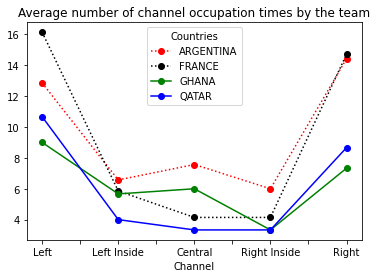

In [47]:
countries_strategy.plot.line(
    title='Average number of channel occupation times by the team',
    style = ['o:r', 'o:k', 'o-g', 'o-b']);
# As you can see, the higher ranking teams have higher possession in each channel
# 

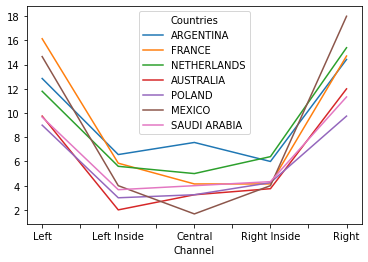

In [48]:
countries_strategy = pd.DataFrame()
for country in ['ARGENTINA', 'FRANCE' ,'CORATIA', 'NETHERLANDS', 'AUSTRALIA', 'POLAND','MEXICO', 'SAUDI ARABIA']:
    countries_strategy = pd.concat([countries_strategy, find_strategy(country)], axis=0)
countries_strategy = countries_strategy.T
countries_strategy.index = ['Left','Left Inside', 'Central', 'Right Inside', 'Right']
countries_strategy.index.names = ['Channel']
countries_strategy.columns.names = ['Countries']
countries_strategy
countries_strategy.plot.line();

# Game intensity

The difference between the percentage of possession of each time demonstrates the intensity of game
- possession team1:                         percentage of possession for team 1
- possession team2:                         percentage of possession for team 2

- yellow cards team1
- yellow cards team2
- red cards team1
- red cards team2
- fouls against team1
- fouls against team2

In [49]:
combine_df = processed_with_ARG_on_team1_df.get(['team1','team2','possession team1','possession team2'])



combine_df 
# insight
# The intensity of the game start rising. During the first few matches, ARGENTINA possesses the ball most of the time 
# In the last few games, each team possesses the ball evenlly. Which means ARGENTINA is playing more carefully compared to group stages



,team1,team2,possession team1,possession team2
4,ARGENTINA,SAUDI ARABIA,64%,24%
23,ARGENTINA,MEXICO,50%,36%
38,ARGENTINA,POLAND,67%,24%
49,ARGENTINA,AUSTRALIA,53%,35%
57,ARGENTINA,NETHERLANDS,44%,45%
60,ARGENTINA,CROATIA,34%,54%
63,ARGENTINA,FRANCE,46%,40%


In [50]:
combine_df = processed_with_ARG_on_team1_df.get(['team1','team2', 'yellow cards team1','yellow cards team2','fouls against team1','fouls against team2'])
combine_df

# insight:
# in the three games: Mexico, Netherland, France, the fouls on each team are high compard to the rest of the game
# combined to the fact Argentina is facing great pressure facing the mexico when they lost their first game against SAUDI ARABIA 



,team1,team2,yellow cards team1,yellow cards team2,fouls against team1,fouls against team2
4,ARGENTINA,SAUDI ARABIA,0,6,7,21
23,ARGENTINA,MEXICO,1,4,15,19
38,ARGENTINA,POLAND,1,1,11,6
49,ARGENTINA,AUSTRALIA,0,2,8,15
57,ARGENTINA,NETHERLANDS,8,8,18,30
60,ARGENTINA,CROATIA,2,2,15,8
63,ARGENTINA,FRANCE,4,3,26,19


# Defense
- goal preventions team1
- goal preventions team2

Forced turnovers show when possession is lost due to pressure from an opponent. The more pressure teams and players apply to an opponent, the more likely they are to force a turnover of possession.
- forced turnovers team1
- forced turnovers team2

In [51]:
processed_with_ARG_on_team1_df.get(['team1','team2', 'goal preventions team1','goal preventions team2','forced turnovers team1','forced turnovers team2'])




,team1,team2,goal preventions team1,goal preventions team2,forced turnovers team1,forced turnovers team2
4,ARGENTINA,SAUDI ARABIA,4,14,65,80
23,ARGENTINA,MEXICO,4,5,63,79
38,ARGENTINA,POLAND,4,25,48,67
49,ARGENTINA,AUSTRALIA,5,14,67,73
57,ARGENTINA,NETHERLANDS,5,15,79,91
60,ARGENTINA,CROATIA,12,10,85,63
63,ARGENTINA,FRANCE,11,21,87,104


# Pass

- passes team1
- passes team2
- passes completed team1
- passes completed team2

A cross pass is a type of pass from deep in the attacking area on the sidelines, aimed in towards the penalty box.
- crosses team1
- crosses team2
- crosses completed team1
- crosses completed team2
The main focus of switching play is to help progress the ball forward by avoiding immediate pressure from the opposition, and in doing so exploiting space on the far side of the pitch. Therefore, accurate passing and well-timed movement from the receiver are key.
- switches of play completed team1
- switches of play completed team2

In [52]:
processed_with_ARG_on_team1_df.get(['team1','team2', 'passes team1','passes team2','passes completed team1','passes completed team2','crosses team1','crosses team2','crosses completed team1','crosses completed team2','switches of play completed team1','switches of play completed team2'])




,team1,team2,passes team1,passes team2,passes completed team1,passes completed team2,crosses team1,crosses team2,crosses completed team1,crosses completed team2,switches of play completed team1,switches of play completed team2
4,ARGENTINA,SAUDI ARABIA,610,267,529,190,29,9,12,2,5,7
23,ARGENTINA,MEXICO,533,356,464,287,14,17,2,4,3,2
38,ARGENTINA,POLAND,862,321,814,261,22,5,5,2,11,8
49,ARGENTINA,AUSTRALIA,711,450,635,381,6,15,1,2,5,8
57,ARGENTINA,NETHERLANDS,603,651,511,557,16,22,4,4,4,5
60,ARGENTINA,CROATIA,408,624,344,551,8,20,2,4,4,8
63,ARGENTINA,FRANCE,648,516,544,419,20,24,4,3,6,5
